In [3]:
%reload_kedro

2019-12-08 19:50:28,410 - root - INFO - ** Kedro project sneakairs
2019-12-08 19:50:28,412 - root - INFO - Defined global variable context


In [4]:
import pandas as pd
pd.set_option('display.max_columns', 100)
from kedro.io import *
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [5]:
df = context.io.load('KOF_04152019_05')

2019-12-08 19:50:28,754 - kedro.io.data_catalog - INFO - Loading data from `KOF_04152019_05` (CSVLocalDataSet)...


In [6]:
df['date'] = pd.to_datetime(df.date)

In [7]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['week'] = df['date'].apply(lambda x: x.week)
df['day'] = df['date'].apply(lambda x: x.day)

In [8]:
def day_id(x):
    if x == 'Sunday':
        return 0
    if x == 'Monday':
        return 1
    if x == 'Tuesday':
        return 2
    if x == 'Wednesday':
        return 3
    if x == 'Thursday':
        return 4
    if x == 'Friday':
        return 5
    if x == 'Saturday':
        return 6

In [9]:
df['month_name'] = df['date'].apply(lambda x: x.month_name())
df['day_name'] = df['date'].apply(lambda x: x.day_name())
df['day_id'] = df['day_name'].apply(lambda x: day_id(x))

In [10]:
df.head(1)

,code_style,name,brand,date,retail_price,colorway,story,kof_wants,avg_resale_stockx,silhouette,price_diff,net_profit,profitable,brand_code,black,white,brown,red,blue,yellow,orange,green,purple,multi_color,main_color,main_color_id,womens,bcollab,og,sp,qs,sb,ls,nrg,prm,nsw,retro,se,pe,gs,hs,year,month,week,day,month_name,day_name,day_id
0,314996-101,Nike Air Foamposite One Snakeskin,Nike,2019-04-15,220,Sail/Black-Habanero Red-Black,"Equipped with an eye-catching upper, this Air ...",2281,305,Air Foamposite One,85,49.545275,1,6,0.864923,0.796686,0.722427,0.843831,0.758602,0.727155,0.705313,0.68003,0.700628,0.541327,black,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,4,16,15,April,Monday,1


In [11]:
df.columns

Index(['code_style', 'name', 'brand', 'date', 'retail_price', 'colorway',
       'story', 'kof_wants', 'avg_resale_stockx', 'silhouette', 'price_diff',
       'net_profit', 'profitable', 'brand_code', 'black', 'white', 'brown',
       'red', 'blue', 'yellow', 'orange', 'green', 'purple', 'multi_color',
       'main_color', 'main_color_id', 'womens', 'bcollab', 'og', 'sp', 'qs',
       'sb', 'ls', 'nrg', 'prm', 'nsw', 'retro', 'se', 'pe', 'gs', 'hs',
       'year', 'month', 'week', 'day', 'month_name', 'day_name', 'day_id'],
      dtype='object')

In [12]:
df.dtypes

code_style                   object
name                         object
brand                        object
date                 datetime64[ns]
retail_price                  int64
colorway                     object
story                        object
kof_wants                     int64
avg_resale_stockx             int64
silhouette                   object
price_diff                    int64
net_profit                  float64
profitable                    int64
brand_code                    int64
black                       float64
white                       float64
brown                       float64
red                         float64
blue                        float64
yellow                      float64
orange                      float64
green                       float64
purple                      float64
multi_color                 float64
main_color                   object
main_color_id                 int64
womens                        int64
bcollab                     

In [16]:
len(df)

6338

### Average retail & resell price by brand

In [18]:
avg_retail = df.groupby(['brand'])['retail_price'].mean().reset_index()

In [19]:
avg_resale = df.groupby(['brand'])['avg_resale_stockx'].mean().reset_index()

In [20]:
pd.merge(avg_retail, avg_resale, on = 'brand')

,brand,retail_price,avg_resale_stockx
0,Adidas,140.965200,148.604728
1,Air Jordan,167.675132,200.757672
2,Asics,160.000000,158.724138
3,Converse,101.034483,124.344828
4,Jordan Brand,136.328358,112.820896
5,New Balance,168.636364,164.545455
6,Nike,144.365976,143.253610
7,Nike Basketball,179.416058,183.656934
8,Nike Running,132.656250,138.562500
9,Other Brands,136.309524,137.857143


### Distribution of brands

In [21]:
df.groupby(['brand'])['code_style'].count().sort_values(ascending =False).reset_index().rename(columns={'Code_Style':'count'})


,brand,code_style
0,Nike,3186
1,Adidas,1523
2,Air Jordan,945
3,Nike Basketball,137
4,Jordan Brand,134
5,Other Brands,126
6,Reebok,105
7,Puma,66
8,Nike Running,32
9,Converse,29


### Pairplot

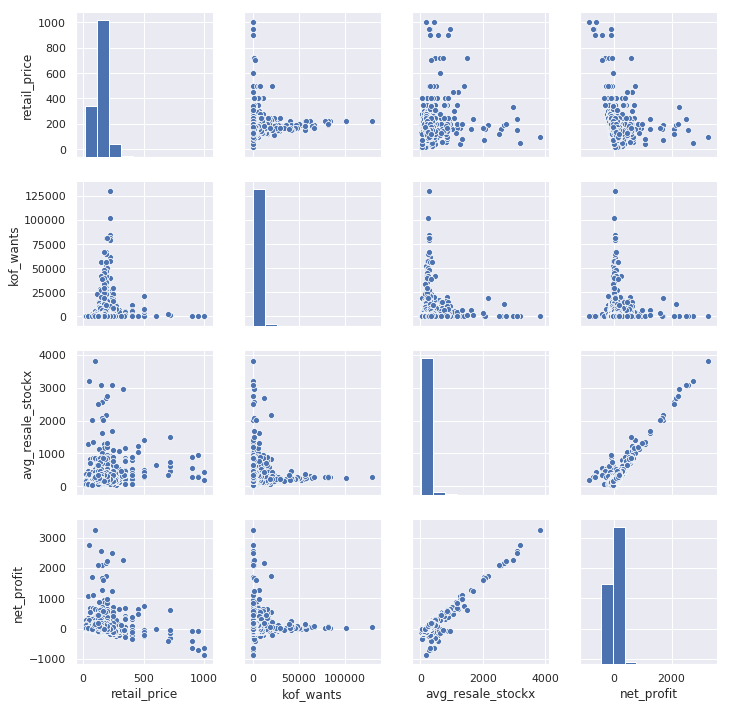

In [23]:
sns.pairplot(df, vars = ['retail_price','kof_wants','avg_resale_stockx','net_profit'])

### Portion of shoes by brand that is profitable on resale

In [28]:
split = df.groupby(['brand', 'profitable'])['name'].count().sort_values(ascending=False).reset_index(name='count')

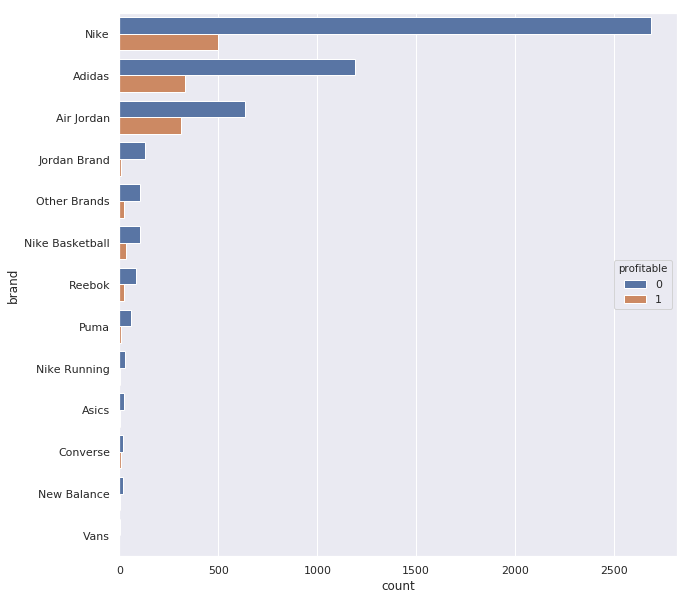

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(data=split, x= 'count', y='brand', hue='profitable')
plt.show()

### Heatmap of number of releases by day

In [33]:
nike = df[df['brand']=='nike']
nike = nike.sort_values(by=['month'])
nike = nike.groupby(['month_name','month','day_name','day_id'])['name'].count().reset_index().rename(columns={'name':'number_of_releases'}).sort_values(by=['month','day_id'], axis=0)


In [34]:
heatmap = nike.pivot('month', 'day_id', 'number_of_releases')

In [36]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

# plt.figure(figsize=(12,8))
# g = sns.heatmap(heatmap, center=0, annot=True, cmap="YlGnBu", fmt='g')
# g.set_xticklabels(days)
# g.set_yticklabels(months, rotation = 360)
# plt.show()

### Plotting release of shoes over time by companies

In [37]:
df['month-'] = df['month'].apply(lambda x: str(x) + '-')
df['year-'] = df['year'].apply(lambda x: str(x))
df['month_year'] = df['month-'] + df['year-']

In [38]:
releases = df.groupby(['brand','date'])['name'].count().reset_index(name='count').sort_values(by=['date'])


In [39]:
releases = releases[releases['date'] >= pd.to_datetime('2013-01-01')]

/anaconda3/envs/sneakairs/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


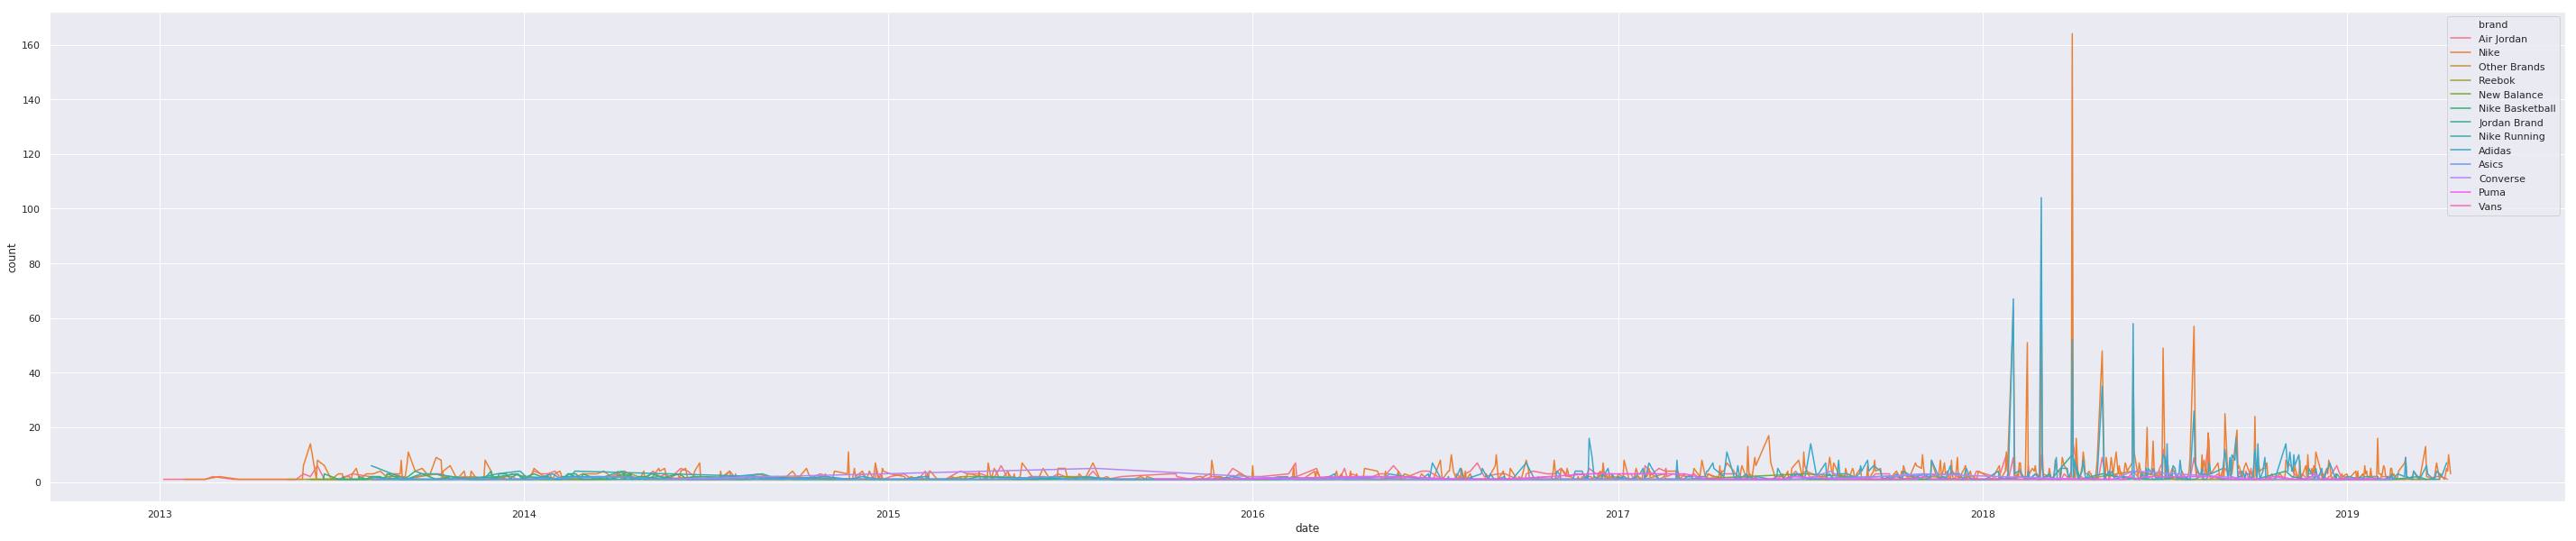

In [41]:
plt.figure(figsize=(50,10))
g = sns.lineplot(data=releases, x = 'date', y = 'count', hue='brand')
plt.show()